## Analysis of University Acceptance Dataset

### About Dataset
This dataset includes various information like GRE score, TOEFL score, university rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, research and chance of admit. In this dataset, 400 entries are included.

> GRE Scores ( out of 340 ) 

>TOEFL Scores ( out of 120 )

>University Rating ( out of 5 )

>Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )

>Undergraduate GPA ( out of 10 )

>Research Experience ( either 0 or 1 )

>Chance of Admit ( ranging from 0 to 1 

In [6]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action= 'ignore')

In [7]:
# reading the dataset
df = pd.read_csv('adm_data.csv', index_col = "Serial No.")

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


#### All the features are integer and float values. 
GRE Score, TOEFL Score: Discrete numerical data

University Rating: Ordinal categorical data

SOP, LOR, Research: Nominal categorical data

CGPA, Chance of Admit: Continuos numerical data

In [13]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [14]:
# checking for null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no null values in the dataset

In [19]:
# renaming columns names 

df.rename(columns = {'GRE Score': 'gre_score', 'TOEFL Score': 'toefl_score', 'University Rating': 'university_rating', 
                     'LOR ': 'lor', 'Chance of Admit ': 'chance_of_admit', 'SOP': 'sop', 'CGPA': 'cgpa', 'Research': 'research'}, 
         inplace = True)

In [26]:
# checking for duplicates rows 
print('Number of duplicate rows are {}'.format(df.shape[0] - df.drop_duplicates().shape[0]))

Number of duplicate rows are 0


### Visualizing and analysing all the columns 

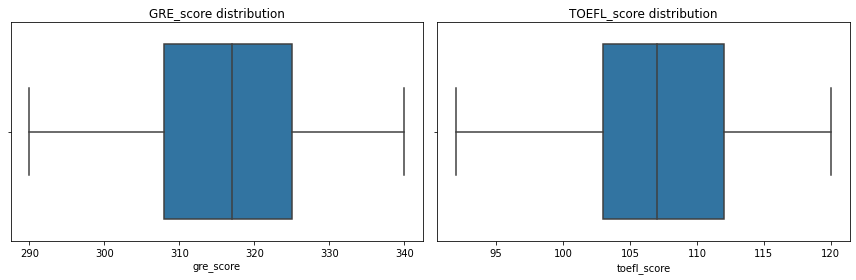

In [44]:
plt.figure(figsize = (12, 4))
plt.subplot2grid((2, 4), (0, 0), 2, 2)
sns.boxplot(df['gre_score'])
plt.title('GRE_score distribution')
plt.subplot2grid((2, 4), (0, 2), 2, 2)
sns.boxplot(df['toefl_score'])
plt.title('TOEFL_score distribution')
plt.tight_layout()

> Most of the students who have applied for universities have GRE score normally around 290-340 and 50% of those students have scored around 308-325. 

> TOEFL score for students applying for universities lies normally around 90-120 and 50% of those students have scored around 105-115. 

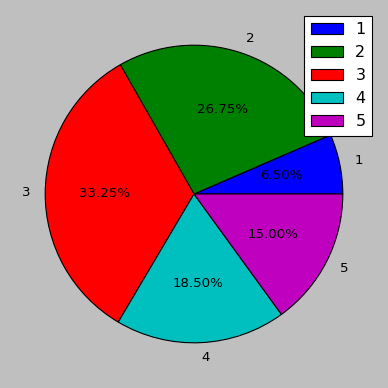

In [69]:
with plt.style.context('classic'):
    plt.figure(figsize = (6, 6))
    uni_rate = df['university_rating'].value_counts().sort_index()
    plt.pie(x = uni_rate, labels = uni_rate.index, autopct = '%.2f%%')
    plt.legend();

Students aiming for universities with rating 1 are very less (6.50%) compared to other universities. About 33.25% of students have applied for university with rating 3. 

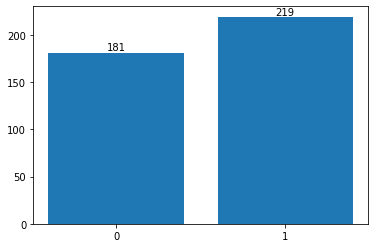

In [81]:
fig, ax = plt.subplots()
research_count = df['research'].value_counts()
plot = plt.bar(research_count.index, research_count.values)
ax.bar_label(plot)
plt.xticks([0, 1]);

We have data of 219 students with research background and 181 students without research background. 

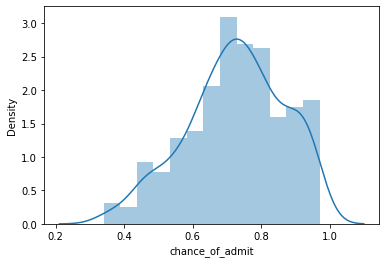

In [86]:
# distribution of chance of admit 
sns.distplot(df['chance_of_admit']);

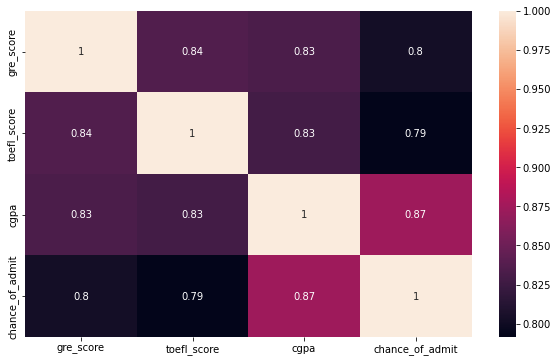

In [91]:
plt.figure(figsize = (10, 6))
numerical_data = df[['gre_score', 'toefl_score', 'cgpa','chance_of_admit']]
sns.heatmap(numerical_data.corr(), annot = True);

> Pearson's coefficient is used to find correlation between numerical features. So correlation between gre_score, toefl_score, cgpa, and chance_of_admit were calculated and plotted. 

> All the features are positively correlated with every other features. 

> For example, gre_score is positively correlated to toefl_score by 0.84 score. Which specifies that if the gre_score increases then there is 84% chance that the toefl also increases. 

## Problem Statements: 

### 1. How LOR score is distributed for students with/without research background?  

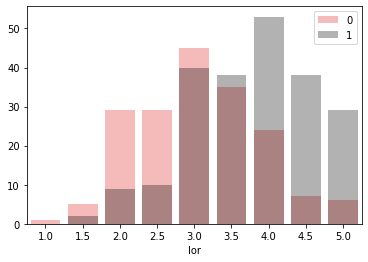

In [93]:
lor_research = df.groupby(['research', 'lor'])['research'].count().unstack()
sns.barplot(x = lor_research.loc[0].index, y = lor_research.loc[0].values, label = '0', color = 'red', alpha = 0.3)
sns.barplot(x = lor_research.loc[1].index, y = lor_research.loc[1].values, label = '1', color = 'black', alpha = 0.3)
# sns.histplot(lor_research.loc[1], label = '1', color = 'blue')
plt.legend();

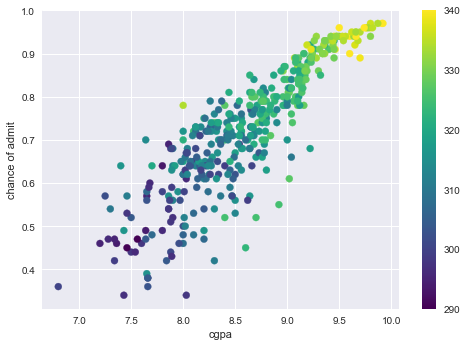

In [77]:
plt.scatter(x = 'CGPA', y = 'Chance of Admit ', data = df, c = 'GRE Score', cmap = 'viridis')
plt.xlabel('cgpa')
plt.ylabel('chance of admit')
plt.colorbar();

In [71]:
df.groupby(['University Rating'])['GRE Score', 'TOEFL Score'].aggregate([min, max, 'count'])

C:\Users\shali\AppData\Local\Temp\ipykernel_49880\2225036099.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['University Rating'])['GRE Score', 'TOEFL Score'].aggregate([min, max, 'count'])


GRE Score            TOEFL Score           
                        min  max count         min  max count
University Rating                                            
1                       290  318    26          92  109    26
2                       293  332   107          95  118   107
3                       298  331   133          97  120   133
4                       290  340    74         100  120    74
5                       303  340    60         103  120    60